# What are the impacts of Property Attributes, Socio-Economic Factors, and Geospatial Location on the the US Real Estate Market ?

## Table of Contents
- [Background](Background)
- [Data Source](#Data-Source)

## Background
The objective of this research is to conduct a comprehensive analysis and build predictive models for key determinants influencing housing pricces. Factors contributing to a property's value are examined to seek uncover trends and patterns of US real estate market. The resulting models will provide a crucial observations and serve as a realiable resource for buyers, investors, and sellers. Those observations are insightful and help in facilitating informed decision-making in the dynamics on housing market. 

## Data Source
The dataset was obtained from Kaggle, containing Real Estate listings in the US by State and zip code. It is collected from https://www.realtor.com/ - a real estate listing website operated by the News Corp subsidiary Move, Inc. and based in Santa Clara, California. The datase has 1 CSV file with 10 columns, each column represents a factor of the property.

## Data Preprocessing
- Counting missing values 
- Construcing the Summary Statistics Table

In [4]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Suppress RuntimeWarnings from NumPy
warnings.filterwarnings("ignore", category=RuntimeWarning)
# Loading the dataset
df = pd.read_csv('realtor-data.zip.csv')
df.head(5)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [2]:
# Checking for null/missing values 
df.isnull().sum()

status                 0
bed               216528
bath              194213
acre_lot          357467
city                 191
state                  0
zip_code             479
house_size        450112
prev_sold_date    686293
price                108
dtype: int64

The dataset exhibites a signficant amount of missing values, specifically in columns: bed, bath, acre_lot, city, zip_code, house_size, prev_sold_date, and price. Those missing values might raise potential biases in decriptive stastitics and potential impact on our analytical insights. A summary statistics table will be useful to give an overview of the distribution of available values with their central tendency and spread.


## Variables Selections
### Dependent variable (Y)
Housing price represents the monetary value of the property in the market. This is the target variable for pricing analysis of real estate across USA regarding to chosen indepedent variables. 

### Independent variable (X)
1. Number of bedrooms 'bed': The number of bedrooms represents the aspect of residential properties and influence a house's market values. Besides, it also provides insights into diversity of personal preferences and different need of house buyers. For instance, they can use extra rooms in the house for guest rooms, home offices, etc. that reflect a very distinct buyers segments within real estate market. 

2. Number of bathrooms 'bath': The number of bathrooms is a fundamental utility for homeowners and potential buyers. It contributes to the functional aspect of a property and also reflece the needs of inidviduals.

3. House size 'house_size': This matters because a bigger living space usually comes with more amentities and features, making the house more valuable. How the size of a house connected to its price is a significant factor. Understanding this relationship helps to know what people value in a home and how much they're willing to pay for it. 



In [4]:
#Plot summary statistics table
independent_variables = ['bed', 'bath', 'house_size', 'price']

selected_columns = independent_variables
subset_df = df[selected_columns]

summary_statistics = subset_df.describe().round()
print(summary_statistics)

             bed       bath  house_size        price
count  1184538.0  1206853.0    950954.0    1400958.0
mean         3.0        2.0      2179.0     818603.0
std          2.0        2.0      3493.0    2683069.0
min          1.0        1.0         4.0          0.0
25%          2.0        2.0      1170.0     235000.0
50%          3.0        2.0      1700.0     446777.0
75%          4.0        3.0      2500.0     795000.0
max        123.0      198.0   1450112.0  875000000.0


The table provide some key insights of the dataset. In terms of number of bedrooms ('bed'), a diverse range is observed with average of 3 bedrooms with a standard deviation of 2, indicating variability around this mean. However, it has some outliers as the max number of bedroosm goes up to 123. Similarly, the bathroom counts have an avergae of 2 bathrooms per property, but there's also a property with 198 bathrooms, rasing some concerns about outliers. These findings underscore the necessity for meticulous outlier detection and critical assessment of the dataset's reliability in accurately representing properties across the state. 

The distribution of living spaces might be right-screwked, with a tail extending towards larger sizes. This is due to the presence of outliers, and since 75% of the data is below 2500, it indicates that the majority of thoe houses have sizes on the lower end. The data implies a potential analysis of geographical locations of houses with an emphasis on those featuring a larger number of bathrooms.

The average house price is $755,479 but the high standard deviation of $1,030,817 represents a wide range of prices of houses across the USA. This distribution serves as a promising foundation for in-depth exploration, particularly in understanding the pricing dynamics of real estate pricing. Understandingthe patterns and trends that contributing to price fluctuations also includes the analysis of characteristics such as neighbourhoods, socio-economic factors, and public amentities is crucial to have a thorough analysis of this distribution. 


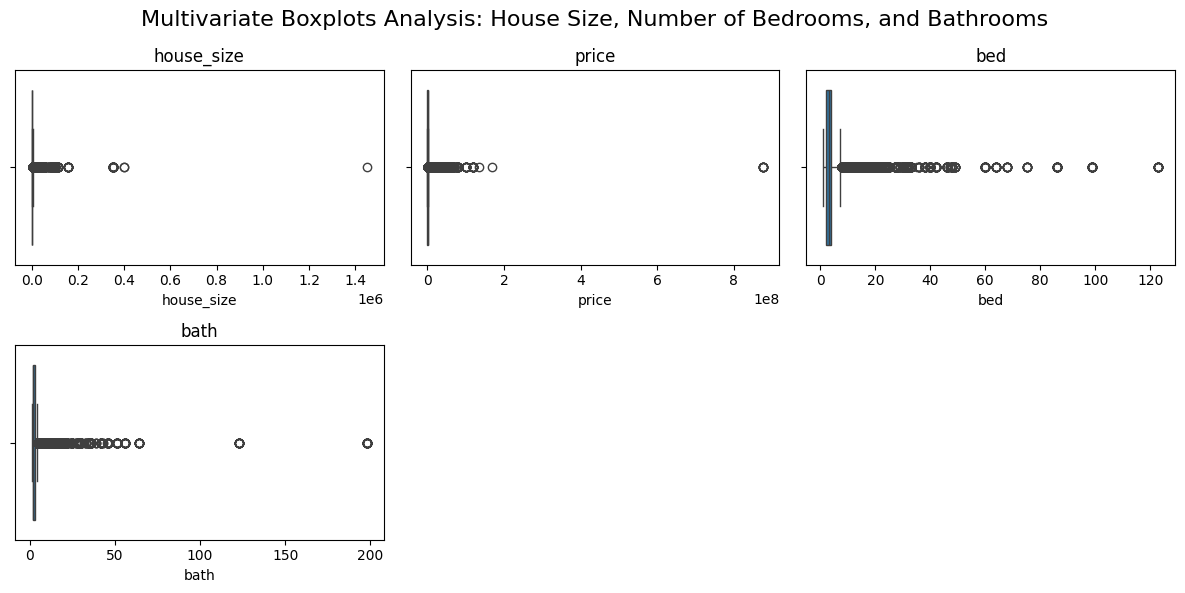

In [5]:
# Using boxplots to identify outliers
numerical_columns = ['house_size', 'price', 'bed', 'bath']
outlier_threshold = 3 

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, x=col)  # Swap y with x
    plt.title(col)
plt.suptitle('Multivariate Boxplots Analysis: House Size, Number of Bedrooms, and Bathrooms', fontsize=16)
plt.tight_layout()
plt.show()


The boxplots above are plotted to identify the outliers in the dataset. The distributions of house size and price exhibit a left-skewed pattern, implying that a majority of the houses in the dataset have smaller sizes, lower prices, and particular of 2-3 bedrooms/bathrooms. 

However, there is a noticable amount of outliers towards the higher end, indicating the presence of luxury properties. Those houses showcase a strong deviation from the typical pattern in the market, regarding to their exceptional prices and living spaces. Further analysis will be crucial to provide insights of those highly valuable properties and how they represent a very different trend in the market.


The bar chart depects a clear trend where the housing prices increase with the number of bedrooms in the properties. However, at a specific larger count, particularly a house with 20 bedrooms, it exhibits a lower price compared to those with 1 to 19 bedrooms. This observation prompts a more in-depth analysis to understand what are the other factors contributing to the drop in prices of properties with larger number of bedrooms. 

Some of the NA values were dropped since Matplotlib and Seaborn libraries in Python do not handle NA values well. Removing them from the data will better the visualization of the data without causing error in compiling codes.

/Users/hanhhieudao/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


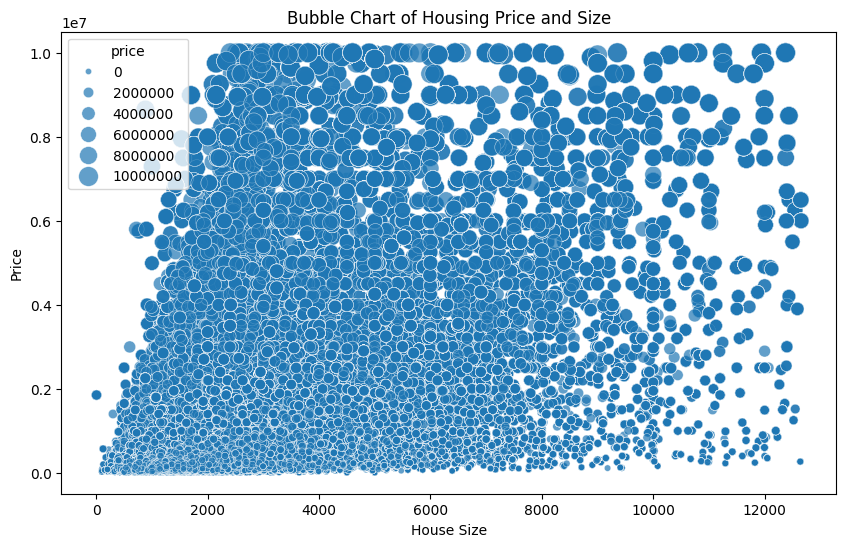

In [7]:
df = pd.read_csv('realtor-data.zip.csv')

# Remove rows with NA values in 'house_size' or 'price'
df = df.dropna(subset=['house_size', 'price'])

# Remove outliers based on a certain criterion (e.g., using z-scores)
z_scores = (df[['house_size', 'price']] - df[['house_size', 'price']].mean()) / df[['house_size', 'price']].std()
df = df[(z_scores.abs() < 3).all(axis=1)]

# Plot the bubble chart
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='house_size', y='price', size='price', sizes=(20, 200), alpha=0.7)

plt.title('Bubble Chart of Housing Price and Size')
plt.xlabel('House Size')
plt.ylabel('Price')
plt.show()


The bubble chart shows that properties with prices under $4,000,000 USD coverges around left bottom corner the houses with size from 2000 square feet to 8000 square feet. There are noteworthy outliers that houses with exorbitant prices up to $1 billion have small living spaces, around 3000 square feet. Those outliers suggests another additional factor that influences the property prices. 


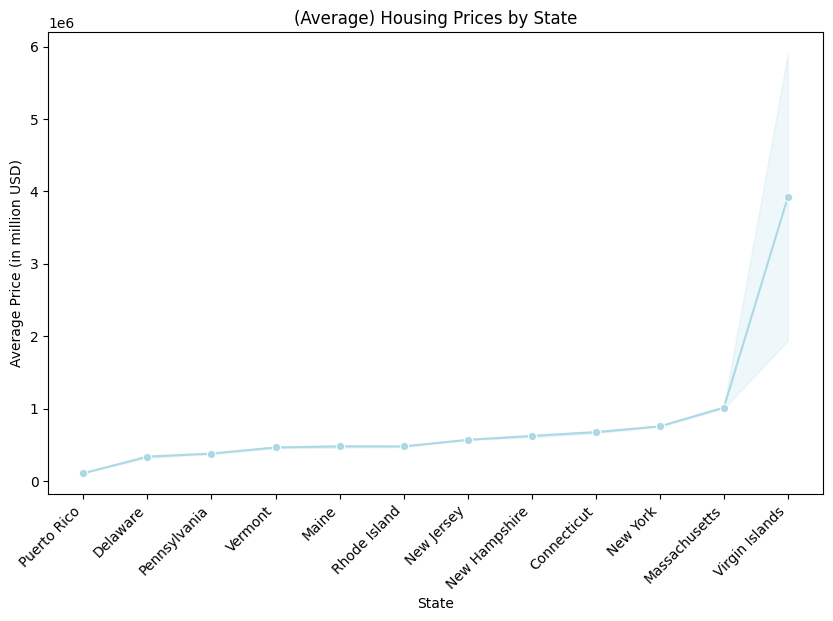

In [8]:
df = pd.read_csv('realtor-data.zip.csv')
df = df.dropna()

# Calculate the average price for each state
mean_prices = df.groupby('state')['price'].mean().sort_values()

df = df.set_index('state').loc[mean_prices.index].reset_index()

# Plotting the line graph with reordered state labels
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='state', y='price', marker='o', color='lightblue')

# Adding labels and title
plt.title('(Average) Housing Prices by State')
plt.xlabel('State')
plt.ylabel('Average Price (in million USD)')

# Rotate the state labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.show()


The line graph illustrates how housing prices vary across different states. States such as (Delaware, Pennsylvannia, Vermount, and Maine), the average prices are below $1 million dollar and represents an affordable market. The prices are escalting for popular states for economics and education such as New Work and Massachuseets. And the price is exceptionally high in Virgin Islands, indicating distinct properties market characterized by a group of upper-class clients. 


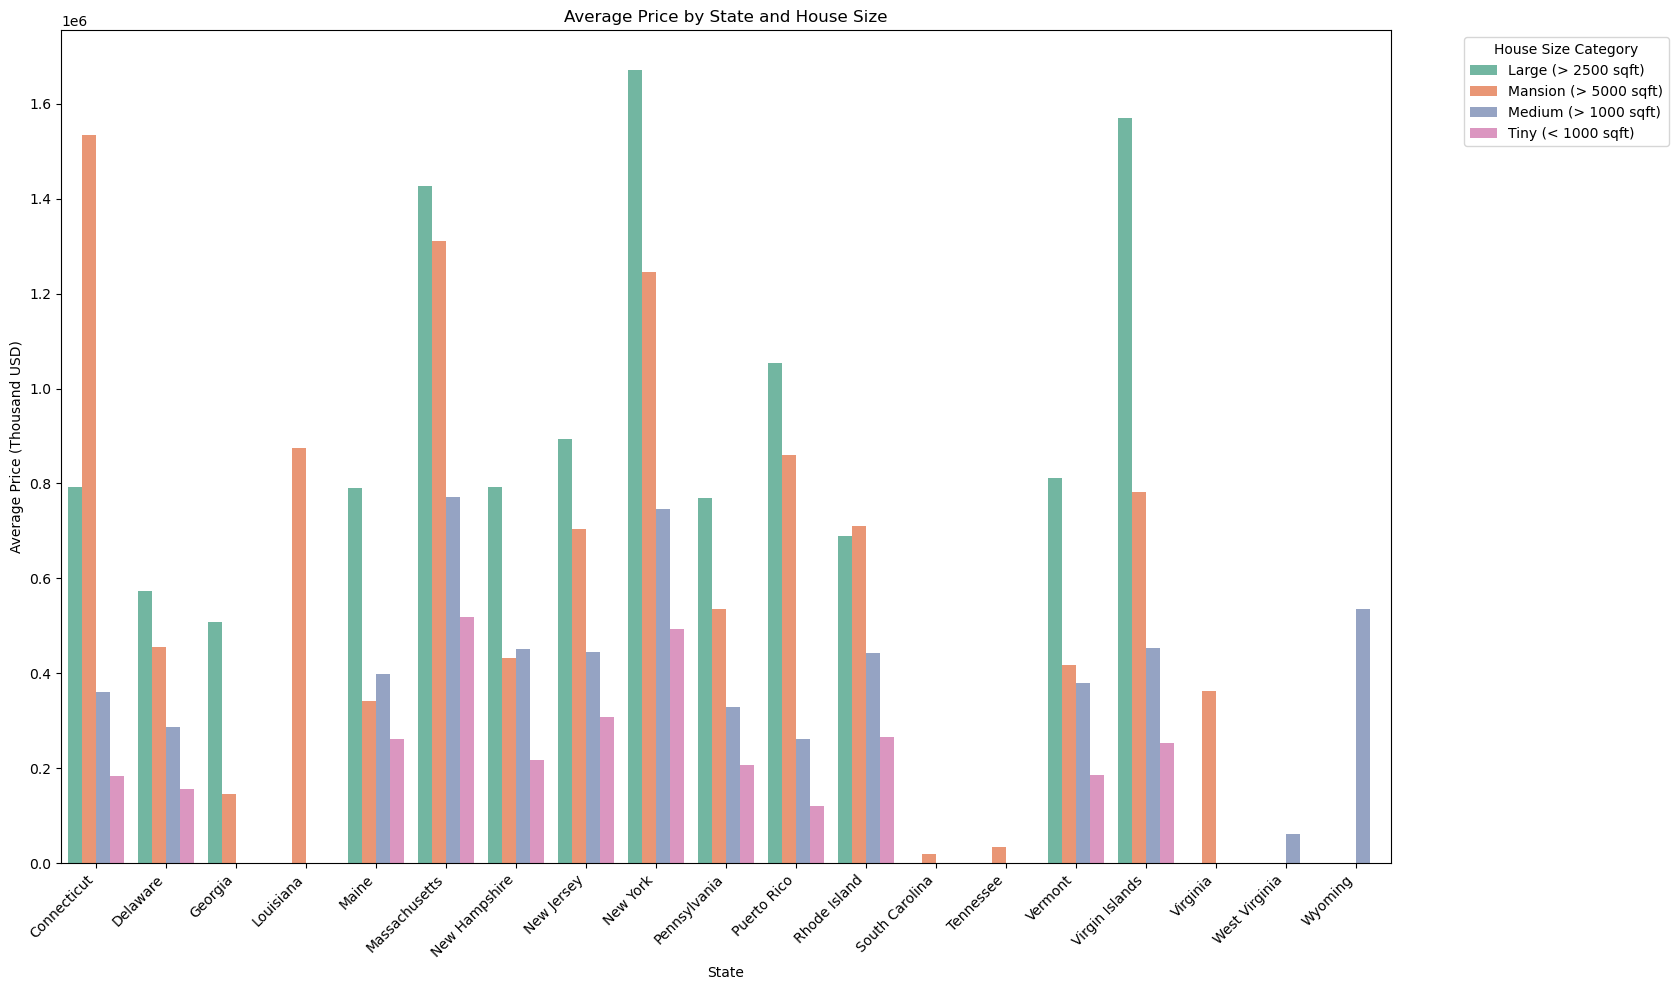

In [40]:
# Create a square_feet function to categorize houses based on their sizes
def square_feet(house_size):
    if house_size <= 1000:
        return 'Tiny (< 1000 sqft)'
    elif 1000 < house_size <= 2500:
        return 'Medium (> 1000 sqft)'
    elif 2500 < house_size <= 5000:
        return 'Large (> 2500 sqft)'
    else:
        return 'Mansion (> 5000 sqft)'

# Apply the square_feet function to create a new column 'house_size_category'
df['house_size_category'] = df['house_size'].apply(square_feet)

# Calculate the average price for each category of houses and group the data
grouped_house_sizes = df.groupby(['state', 'house_size_category'])['price'].mean().reset_index()

plt.figure(figsize=(20, 10))

# Plot the grouped bar chart with additional separation
sns.barplot(x='state', y='price', hue='house_size_category', data=grouped_house_sizes, palette="Set2", dodge=1)

plt.title('Average Price by State and House Size')
plt.xlabel('State')
plt.ylabel('Average Price (Thousand USD)')

plt.xticks(rotation=45, ha='right')
plt.legend(title='House Size Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.85, 1]) 
plt.show()


From the chart, <span style="color:#00b377; font-weight:bold;">New York</span> and <span style="color:#00b377; font-weight:bold;">Massachusetts</span> stand out for recording high prices in the real estate market, particularly for large houses with sizes exceeding 2500 square feet. These states are home to major cities that serve as centers of economic activity and education. <span style="color:#00b377; font-weight:bold;">Virgin Island</span>, on the other hand, has a severely limited supply of housing with very high cost of living due to imported goods.

# Conclusion
In this paper, I analyze the contribution of key determinants of properties to investigate how they affect their prices in the US Real Estate market. With a large database of properties across multiple states in the US, this paper ressearched whether there is a specific trends or patterns in the prices regarding to the property's characteristics based on collected data. 

The rising housing prices are linked to the ammentites of the properties, including their sizes, number of rooms, and location. In addition, the fluctuation in housing prices also reflect the diversity of demographic buyers with distinct backgrounds. Moreover, a comprehensive analysis of US real estate markey not only represents the trends in housing prices, but also reflects broafer dynamics of the US economy, encapsulating the diverse demands, preferences, and income levels of various social groups. 